In [1]:
from google.colab import files
import pandas as pd

# Upload file
uploaded = files.upload()

# Load the CSV into a pandas DataFrame
# The uploaded file is stored in uploaded dict, so we access its key
for filename in uploaded.keys():
    df = pd.read_csv(filename)

# Display the first few rows of the dataframe
df.head()


Saving twitter_validation.csv to twitter_validation.csv


,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [2]:
from google.colab import files
import pandas as pd

# Upload file
uploaded = files.upload()

# Load the CSV into a pandas DataFrame
# The uploaded file is stored in uploaded dict, so we access its key
for filename in uploaded.keys():
    df = pd.read_csv(filename)

# Display the first few rows of the dataframe
df.head()


Saving twitter_training.csv to twitter_training.csv


,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [3]:
import pandas as pd
import numpy as np

In [4]:
df=pd.read_csv('twitter_training.csv')
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [5]:
df.columns=['TweetID','entity','sentiment','Tweet content']
df.head()

,TweetID,entity,sentiment,Tweet content
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


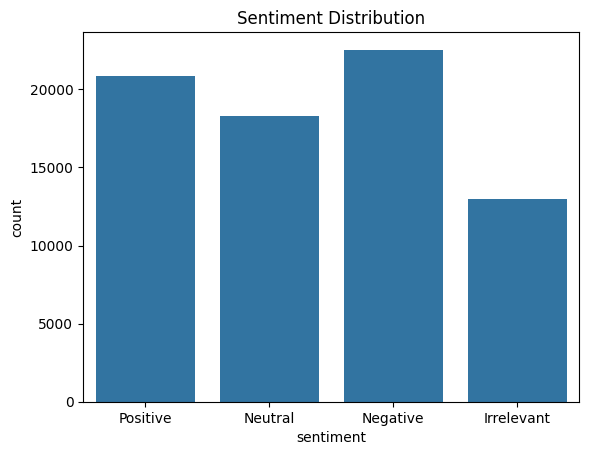

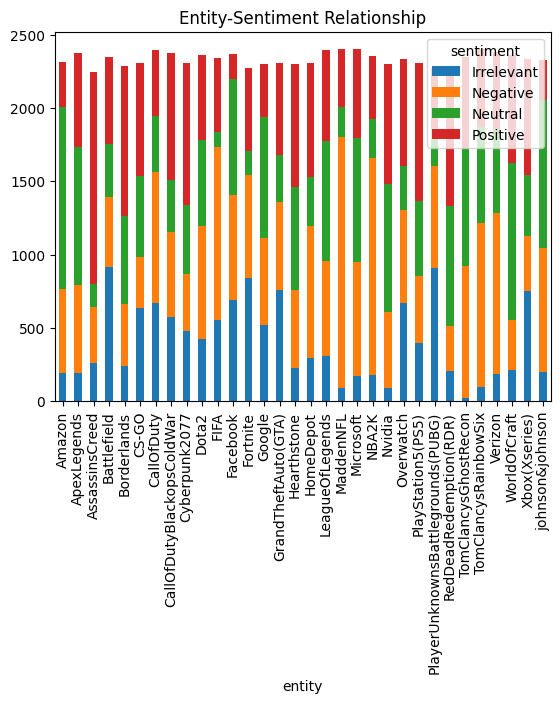

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sentiment distribution
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution')
plt.show()

# Entity and sentiment relationship
entity_sentiment_counts = df.groupby(['entity', 'sentiment']).size().unstack()
entity_sentiment_counts.plot(kind='bar', stacked=True)
plt.title('Entity-Sentiment Relationship')
plt.show()

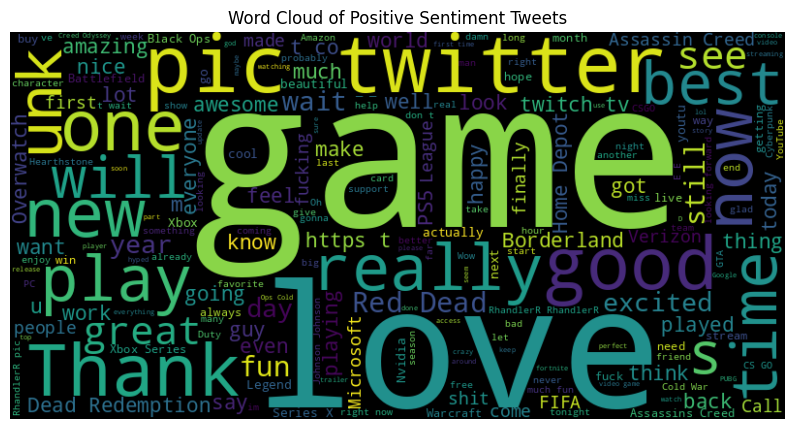

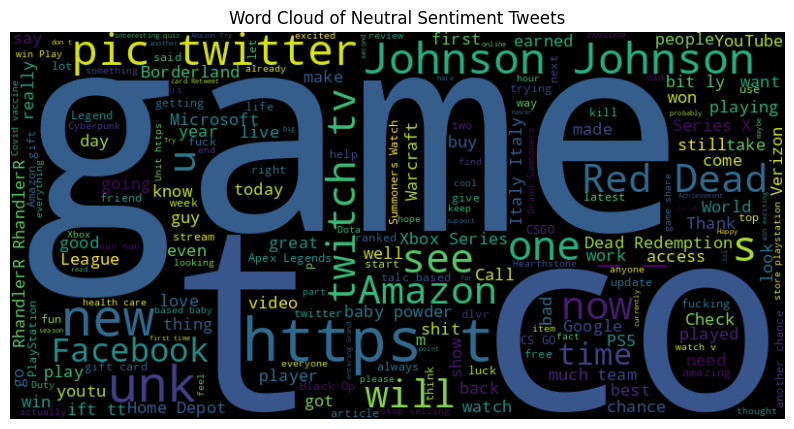

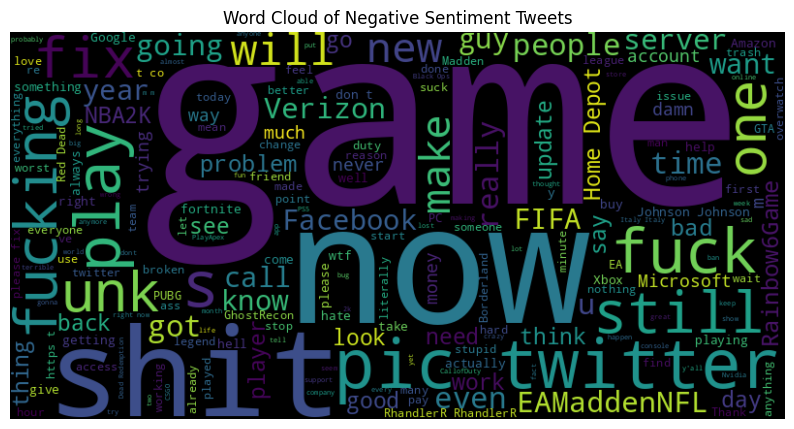

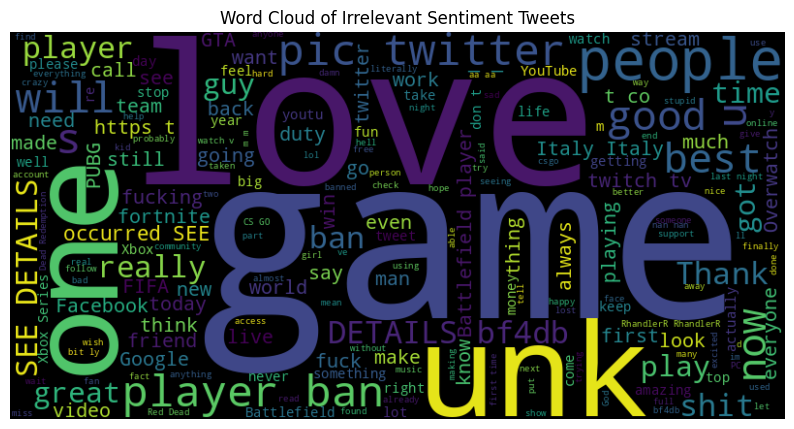

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(sentiment):
    # Filter tweets of the specified sentiment and extract the 'Tweet content' column
    tweets = df[df["sentiment"] == sentiment]["Tweet content"]

    # Convert the tweets to strings
    tweets = tweets.astype(str)

    # Join all the tweets into a single string
    text = ' '.join(tweets)


    # Create a WordCloud object
    wordcloud = WordCloud(width=800, height=400).generate(text)

    # Display the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud of {sentiment} Sentiment Tweets')
    plt.show()

# Iterate over the unique sentiments in the DataFrame
sentiments = df['sentiment'].unique()
for sentiment in sentiments:
    generate_wordcloud(sentiment)


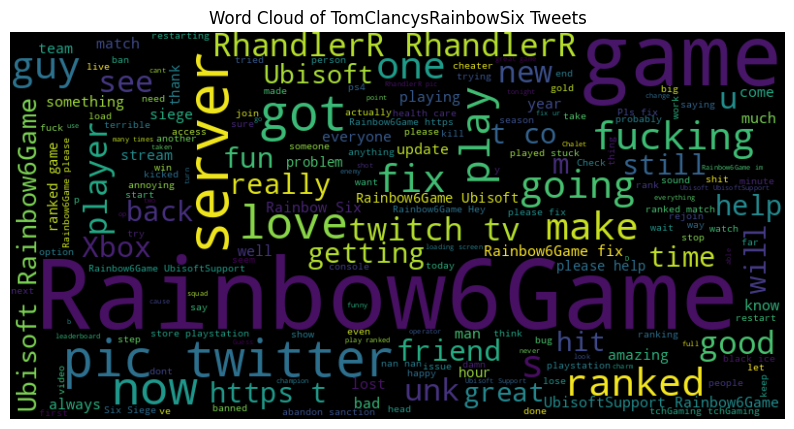

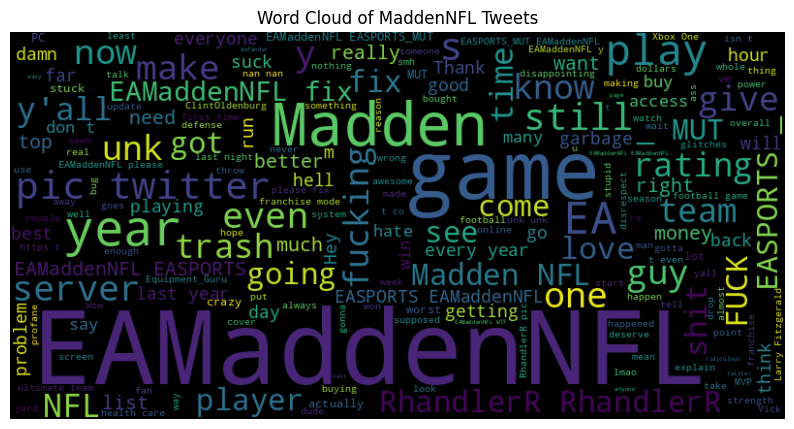

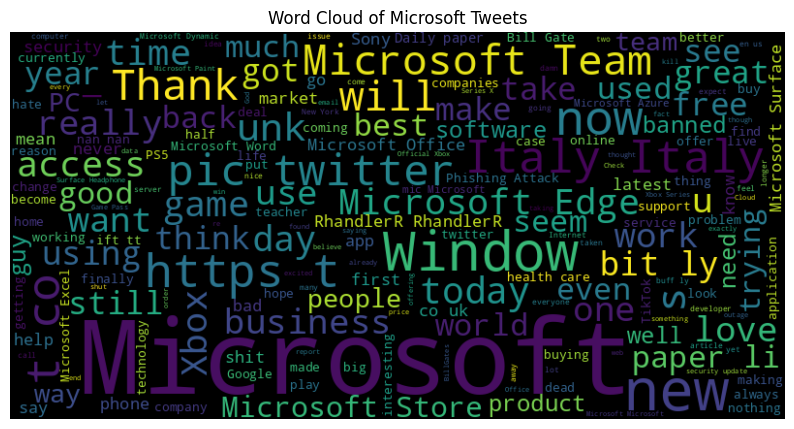

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Calculate the counts of each entity
entity_counts = df['entity'].value_counts()

# Select the top three entities with the highest counts
top_entities = entity_counts.head(3).index.tolist()

# Iterate over the top entities and generate word clouds
for entity in top_entities:
    # Filter tweets associated with the current entity and extract the 'Tweet content' column
    tweets = df[df['entity'] == entity]['Tweet content']

    # Convert the tweets to strings
    tweets = tweets.astype(str)

    # Join all the tweets into a single string
    text = ' '.join(tweets)

    # Create a WordCloud object
    wordcloud = WordCloud(width=800, height=400).generate(text)

    # Display the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud of {entity} Tweets')
    plt.show()


In [15]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Download stopwords if not already downloaded
nltk.download('stopwords')
nltk.download('punkt')

# Preprocessing function
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text.lower())
    # Remove stopwords and punctuation
    stop_words = set(stopwords.words('english') + list(string.punctuation))
    filtered_tokens = [token for token in tokens if token not in stop_words]
    return ' '.join(filtered_tokens)
# Apply preprocessing to the 'Tweet content' column
df['Tweet content']=df['Tweet content'].astype('str')
df['clean_text'] = df['Tweet content'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(df['clean_text'], df['sentiment'], test_size=0.2, random_state=42)
# Vectorize the text data
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_val_vec = vectorizer.transform(X_val)

# Train a Support Vector Machine (SVM) classifier
svm = SVC(kernel='linear')
svm.fit(X_train_vec, y_train)

# Make predictions on the validation set
y_pred = svm.predict(X_val_vec)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
report = classification_report(y_val, y_pred)

print('Accuracy:', accuracy)
print('Classification Report:')
print(report).


Accuracy: 0.8381201044386423
Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.87      0.77      0.82      2661
    Negative       0.86      0.88      0.87      4471
     Neutral       0.85      0.80      0.83      3551
    Positive       0.79      0.87      0.83      4254

    accuracy                           0.84     14937
   macro avg       0.84      0.83      0.83     14937
weighted avg       0.84      0.84      0.84     14937



In [17]:
validation_df = pd.read_csv('twitter_validation.csv')

validation_df.columns=['TweetID','entity','sentiment','Tweet content']

In [18]:
# Preprocess the text data in the validation dataset
validation_df['clean_text'] = validation_df['Tweet content'].apply(preprocess_text)

# Vectorize the text data
X_val_data = vectorizer.transform(validation_df['clean_text'])

# Make predictions on the validation data
y_val_pred = svm.predict(X_val_data)

# save the predicted sentiments
predictions_df = pd.DataFrame({'Predicted Sentiment': y_val_pred})
predictions_df.to_csv('predicted_sentiments.csv', index=False)

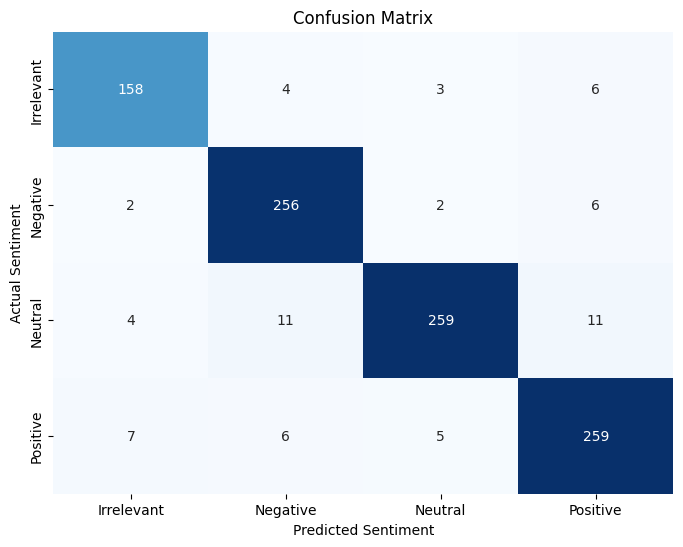

Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.92      0.92      0.92       171
    Negative       0.92      0.96      0.94       266
     Neutral       0.96      0.91      0.94       285
    Positive       0.92      0.94      0.93       277

    accuracy                           0.93       999
   macro avg       0.93      0.93      0.93       999
weighted avg       0.93      0.93      0.93       999



In [19]:
from sklearn.preprocessing import LabelEncoder

# Define the LabelEncoder object
label_encoder = LabelEncoder()

# Fit the LabelEncoder on the sentiment labels in the training data
label_encoder.fit(df['sentiment'])
from sklearn.metrics import confusion_matrix, classification_report

actual_sentiments=validation_df['sentiment']
predicted_sentiments=y_val_pred
# Create a confusion matrix
confusion = confusion_matrix(actual_sentiments, predicted_sentiments)

# Create a classification report
classification = classification_report(actual_sentiments, predicted_sentiments)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Sentiment')
plt.ylabel('Actual Sentiment')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report
print("Classification Report:\n", classification)

Random Forest Accuracy: 0.9137042244091852
Random Forest Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.97      0.86      0.91      2661
    Negative       0.94      0.92      0.93      4471
     Neutral       0.90      0.91      0.91      3551
    Positive       0.87      0.95      0.90      4254

    accuracy                           0.91     14937
   macro avg       0.92      0.91      0.91     14937
weighted avg       0.92      0.91      0.91     14937

Decision Tree Accuracy: 0.8005623619200642
Decision Tree Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.80      0.73      0.76      2661
    Negative       0.84      0.82      0.83      4471
     Neutral       0.79      0.79      0.79      3551
    Positive       0.77      0.84      0.80      4254

    accuracy                           0.80     14937
   macro avg       0.80      0.79      0.80     14937
weighted avg       0.80  

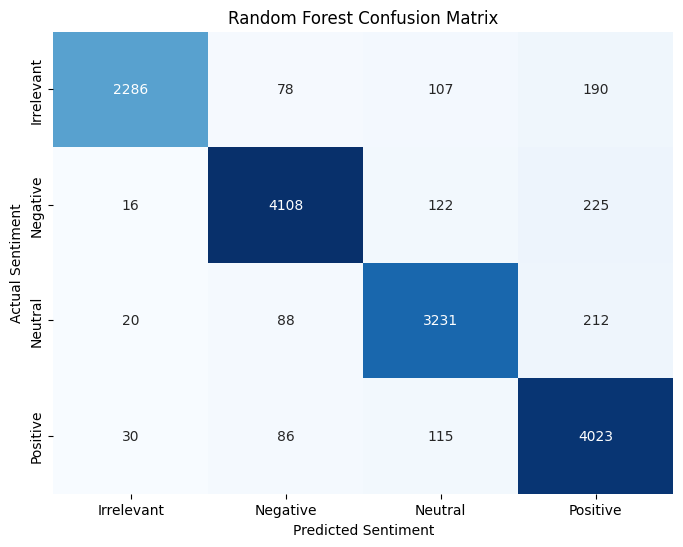

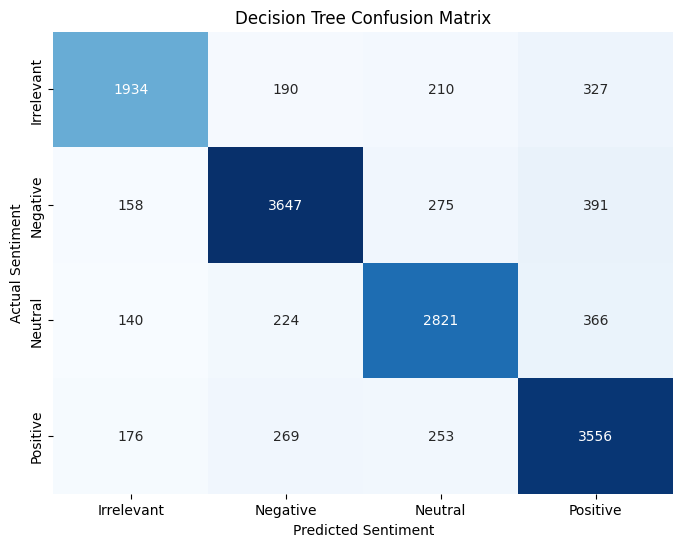

In [29]:
# Import necessary libraries for Random Forest and Decision Tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_vec, y_train)

# Train a Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_vec, y_train)

# Make predictions on the validation set using both classifiers
y_pred_rf = rf.predict(X_val_vec)
y_pred_dt = dt.predict(X_val_vec)

# Evaluate Random Forest
accuracy_rf = accuracy_score(y_val, y_pred_rf)
report_rf = classification_report(y_val, y_pred_rf)

# Evaluate Decision Tree
accuracy_dt = accuracy_score(y_val, y_pred_dt)
report_dt = classification_report(y_val, y_pred_dt)

print('Random Forest Accuracy:', accuracy_rf)
print('Random Forest Classification Report:')
print(report_rf)

print('Decision Tree Accuracy:', accuracy_dt)
print('Decision Tree Classification Report:')
print(report_dt)

# Confusion Matrix for Random Forest
confusion_rf = confusion_matrix(y_val, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_rf, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Sentiment')
plt.ylabel('Actual Sentiment')
plt.title('Random Forest Confusion Matrix')
plt.show()

# Confusion Matrix for Decision Tree
confusion_dt = confusion_matrix(y_val, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_dt, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Sentiment')
plt.ylabel('Actual Sentiment')
plt.title('Decision Tree Confusion Matrix')
plt.show()

# Predictions on the validation set (external data) for Random Forest
y_val_pred_rf = rf.predict(X_val_data)

# Save Random Forest predictions to a CSV file
predictions_rf_df = pd.DataFrame({'Predicted Sentiment': y_val_pred_rf})
predictions_rf_df.to_csv('predicted_sentiments_rf.csv', index=False)

# Predictions on the validation set (external data) for Decision Tree
y_val_pred_dt = dt.predict(X_val_data)

# Save Decision Tree predictions to a CSV file
predictions_dt_df = pd.DataFrame({'Predicted Sentiment': y_val_pred_dt})
predictions_dt_df.to_csv('predicted_sentiments_dt.csv', index=False)

Naive Bayes Accuracy: 0.7366271674365669
Naive Bayes Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.95      0.45      0.61      2661
    Negative       0.66      0.90      0.77      4471
     Neutral       0.82      0.65      0.72      3551
    Positive       0.73      0.82      0.77      4254

    accuracy                           0.74     14937
   macro avg       0.79      0.70      0.72     14937
weighted avg       0.77      0.74      0.73     14937



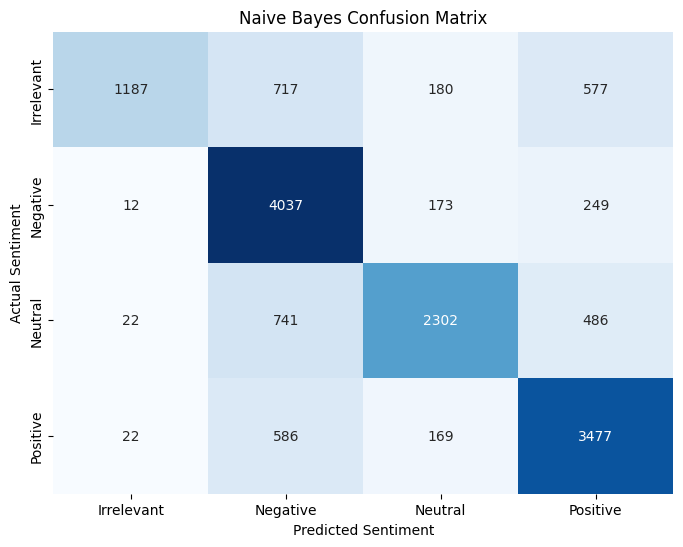

In [30]:
# Import necessary libraries for Naive Bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train a Naive Bayes classifier
nb = MultinomialNB()
nb.fit(X_train_vec, y_train)

# Make predictions on the validation set
y_pred_nb = nb.predict(X_val_vec)

# Evaluate Naive Bayes
accuracy_nb = accuracy_score(y_val, y_pred_nb)
report_nb = classification_report(y_val, y_pred_nb)

print('Naive Bayes Accuracy:', accuracy_nb)
print('Naive Bayes Classification Report:')
print(report_nb)

# Confusion Matrix for Naive Bayes
confusion_nb = confusion_matrix(y_val, y_pred_nb)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_nb, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Sentiment')
plt.ylabel('Actual Sentiment')
plt.title('Naive Bayes Confusion Matrix')
plt.show()

# Predictions on the validation set (external data)
y_val_pred_nb = nb.predict(X_val_data)

# Save Naive Bayes predictions to a CSV file
predictions_nb_df = pd.DataFrame({'Predicted Sentiment': y_val_pred_nb})
predictions_nb_df.to_csv('predicted_sentiments_nb.csv', index=False)